In [2]:
%reload_ext autoreload
%autoreload
%matplotlib inline
import os, json,glob,sys,io
from types import SimpleNamespace
from experiment import run_model
from eval import calculate_stats, eval_model
import pickle
from datetime import datetime 
import torch
from torch import nn
from transformers import BertTokenizer
from model.MedClinical import Biobert_fc 
from sklearn.metrics import classification_report, f1_score
from util.tools  import load_config
from util.DataLoader  import *
from pathlib import Path, PureWindowsPath, PurePosixPath
import traceback
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [4]:
config_folder = "config/"
config = load_config(config_folder)

training metric file outputs\re\BioBERT_CNN_fc2020-11-28 09_52_32_142950_train_metrics_.pkl
[[0, 111077074.83433414, 0.8984331464909693], [1, 109239077.6573317, 0.9648605238142066], [2, 108666215.96807456, 0.9730881437047235], [3, 108544874.57104897, 0.9742518110597568], [4, 108482751.81604171, 0.9751204641557675], [5, 108404522.97863674, 0.9759891172517783], [6, 108314340.89242458, 0.9760710656570624], [7, 108380488.12766147, 0.9765135870455961], [8, 108307814.52206612, 0.976857770347789], [9, 108272264.46187592, 0.9771855639689252]]

 
 

training metric file outputs\re\BioBERT_CNN_fc2020-11-28 12_39_05_806396_train_metrics_.pkl
[[0, 111623180.7278831, 0.8918936637493035], [1, 109163240.27297759, 0.9661389189366375], [2, 108756487.12372327, 0.9717605795391222], [3, 108666121.67842984, 0.9730225849804963], [4, 108561879.50465584, 0.974071524568132], [5, 108505157.82915473, 0.9748418395778018], [6, 108439937.85680223, 0.9755465958632445], [7, 108407877.34264684, 0.976267741829744], [8,

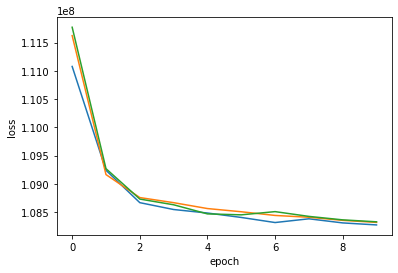

In [6]:
models_folder_name = config.programsettings.OUTPUT_DIR
data_folder = Path(models_folder_name)
list_train_metrics = list(data_folder.glob('*.pkl'))
num_labels = 9

f1_score_list = []
for metrics_file in list_train_metrics:
    print('training metric file', metrics_file)
    with open(metrics_file,"rb") as f:
        train_metric = pickle.load(f)
        print(train_metric)

    print("\n \n \n")

    plt.plot(np.array(train_metric)[:,0], np.array(train_metric)[:,1])
    plt.xlabel("epoch")
    plt.ylabel("loss")
